<center><h1>Entrenamiento y Modelamiento  - Inteligencia Artificial</h1></center>

Nombres:

- Genesis Heredia
- Kevin Paute Sánchez

Fecha: 26/08/2022

# Importar librerías

In [2]:
# Se realiza la importación de la libreria os
import os
# Se realiza la importación de la libreriaOpenCV
import cv2
# Se realiza la importación de la librerianumpy
import numpy as np
# Se realiza la importación de Image de la libreria PIL
from PIL import Image
# Se realiza la importación de la libreriamatplotlib
import matplotlib.pyplot as plt
# Se realiza la importación de train_test_split de la libreria sklearn
from sklearn.model_selection import train_test_split
# Preparamos el ambiente
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# Se realiza la importación dekeras de la libreria tensorflow
from tensorflow import keras
# Importamos Sequential de la libreria keras
from keras.models import Sequential
# Importamos Conv2D,MaxPooling2D,Dense,Flatten,Dropout de la libreria keras
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout, Activation
# Importamos BatchNormalization de la libreria tensorflow
from tensorflow.keras.layers import BatchNormalization
# Se realiza la importación de la libreria tensorflow
import tensorflow as tf
# Importamos la libreria visualkeras
import visualkeras
# Importamos la libreria EarlyStopping de tensorflow
from tensorflow.keras.callbacks import EarlyStopping
# Importamos la libreria PCA
from sklearn.decomposition import PCA

# Data loading and exploration

In [3]:
# Se define la ruta de las imagenes que fueron removidas el fondo
removeBG_img = 'dataset_imagenes_removedBG'
# Se inicializa la variable random_seed con nueve
random_seed = 9
# Obtenemos las categorias
categories = os.listdir(removeBG_img)
# Mostramos las categorias
print("Lista de categorias = ",categories,"\n\nNo. de categorias = ", len(categories))

Lista de categorias =  ['Ariel Chabla', 'ArroboMercy', 'BarraganSteven', 'CevallosJoan', 'EnriquezSelena', 'GenesisHeredia', 'GoyesAnthony', 'HectorCedenio', 'Jhon Zambrano', 'Jordan Espinosa', 'Jorge Borrero', 'JoseRuiz', 'LucioCarlos', 'MasacheFernando', 'MelanyLopez', 'MosqueraLucy', 'NatalyAcosta', 'OlallaLuis', 'ParragaMariaJose', 'PauteKevin', 'Raymond Davila', 'RivasSelena', 'SalazarJohana', 'SolanoWilmer', 'SolorzanoBryan', 'VinicioBorja'] 

No. de categorias =  26


In [4]:
def load_images_and_labels(categories):
    '''
        Método que carga las imágenes y sus etiquetas de las categorías
        de la carpeta removeBG_img.
        Parámetros:
            categories: lista de categorías a cargar
        Retorna:
            images: lista de imágenes de las categorías
            labels: lista de etiquetas de las imágenes   
    '''
    # Se Instancia la lista de imagenes
    img_lst=[]
    # Se Instancia   la lista de etiquetas
    labels=[]
    # Bucle encargado de cargar las imágenes de las categorías
    for index, category in enumerate(categories):
        # Bucle que recorre la ruta de las imagenes
        for image_name in os.listdir(removeBG_img+"/"+category):
            # Leer las imagenes
            img = cv2.imread(removeBG_img+"/"+category+"/"+image_name)
            #  Convierte la imagen a RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            IMAGE_SIZE = (192,192)
            img = cv2.resize(img, IMAGE_SIZE)
            # Convierte la imagen a un array
            img_array = Image.fromarray(img, 'RGB')
            # Agrega la imagen al array de imágenes
            img_lst.append(np.array(img_array))
            # Agrega el indice a las etiquetas
            labels.append(index)
    #Retorna la lista de imagenes y etiquetas
    return img_lst, labels

# Cargamos las imagenes y las etiquetas
images, labels = load_images_and_labels(categories)
# Mostramos la cantidad de imagenes y etiquetas cargadas
print("No. de imagenes cargadas = ",len(images),"\nNo. de etiquetas cargadas = ",len(labels))
# Mostramos el tipo de arreglo creado
print(type(images),type(labels))

No. de imagenes cargadas =  2600 
No. de etiquetas cargadas =  2600
<class 'list'> <class 'list'>


In [5]:
# convierte la lista de imágenes a un array de numpy
images = np.array(images) 
# convierte la lista de etiquetas a un array de numpy
labels = np.array(labels) 
# muestra las dimensiones de las imágenes y las etiquetas
print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape) 
# muestra el tipo de las imágenes y las etiquetas
print(type(images),type(labels)) 

Images shape =  (2600, 192, 192, 3) 
Labels shape =  (2600,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


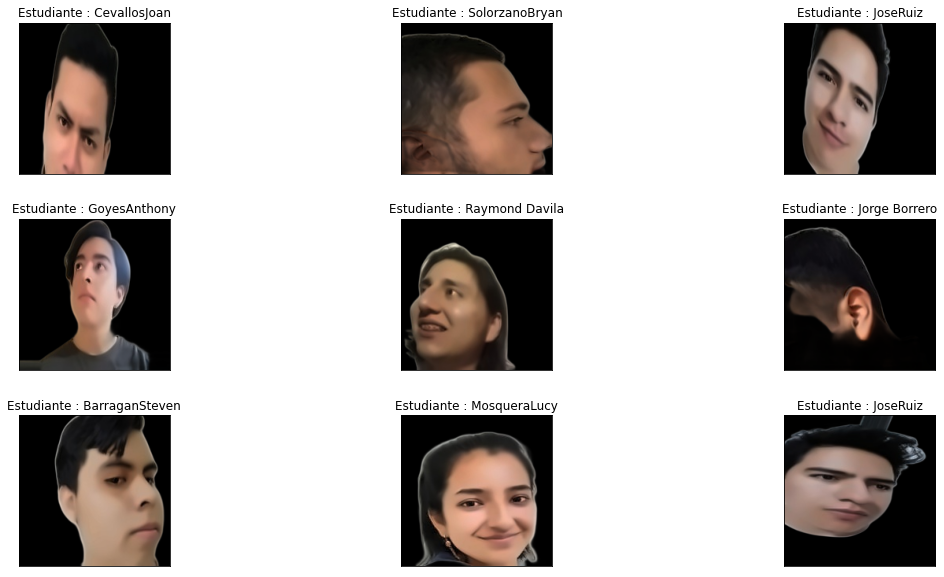

In [6]:
def display_rand_images(images, labels):
    '''
        Método que muestra una imagen aleatoria de cada categoría
        de la carpeta fpath.
        Parámetros:
            images: lista de imágenes de las categorías
            labels: lista de etiquetas de las imágenes   
    '''
    # crea una figura de 19x10
    plt.figure(1 , figsize = (19 , 10)) 
    # contador de imágenes
    n = 0 
    # recorre las categorías de las imágenes y las etiquetas 
    for i in range(9): 
        # incrementa el contador de imágenes
        n += 1 
        # obtiene un número aleatorio entre 0 y el tamaño de la lista de imágenes
        r = np.random.randint(0 , images.shape[0] , 1) 
        # crea una subgráfica de 3x3 con el número de la imagen
        plt.subplot(3 , 3 , n) 
        # ajusta el espaciado entre subgráficas
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3) 
        # muestra la imagen en la subgráfica
        plt.imshow(images[r[0]]) 
        # muestra el título de la imagen junto con la etiqueta
        plt.title('Estudiante : {}'.format(categories[labels[r[0]]]))
        # oculta los ejes x
        plt.xticks([]) 
         # oculta los ejes y
        plt.yticks([])
    # muestra la gráfica    
    plt.show() 
# muestra las imágenes aleatorias    
display_rand_images(images, labels) 

# Preparación de la data para entrenamiento del modelo CNN

In [7]:
# crea un array de números enteros de 0 a la cantidad de imágenes
n = np.arange(images.shape[0]) 
# muestra los valores del array de números enteros
print("'n' valores antes de shuffling = ",n) 
# establece el semilla para el random shuffle
np.random.seed(random_seed) 
 # random shuffle el array de números enteros
np.random.shuffle(n)
# muestra los valores del array
print("\n'n' valores después de shuffling = ",n) 

'n' valores antes de shuffling =  [   0    1    2 ... 2597 2598 2599]

'n' valores después de shuffling =  [1740 1738 1000 ...  501  348  382]


In [8]:
# Imagenes shuffleadas
images = images[n] 
# Etiquetas shuffleadas
labels = labels[n] 
# muestra las dimensiones de las imágenes y las etiquetas
print("Images shape después de shuffling = ",images.shape,"\nLabels shape después de shuffling = ",labels.shape) 

Images shape después de shuffling =  (2600, 192, 192, 3) 
Labels shape después de shuffling =  (2600,)


In [9]:
# convierte las imágenes a float32
images = images.astype(np.float32) 
# convierte las etiquetas a int32
labels = labels.astype(np.int32) 
# normaliza las imágenes
images = images/255 
# muestra las dimensiones de las imágenes
print("Images shape después de normalización = ",images.shape) 

Images shape después de normalización =  (2600, 192, 192, 3)


In [10]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

x_val = x_train[:520]
y_val = y_train[:520]
x_train = x_train[520:]
y_train = y_train[520:]

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

print("\nx_val shape = ",x_val.shape)
print("y_val shape = ",y_val.shape)

x_train shape =  (1560, 192, 192, 3)
y_train shape =  (1560,)

x_test shape =  (520, 192, 192, 3)
y_test shape =  (520,)

x_val shape =  (520, 192, 192, 3)
y_val shape =  (520,)


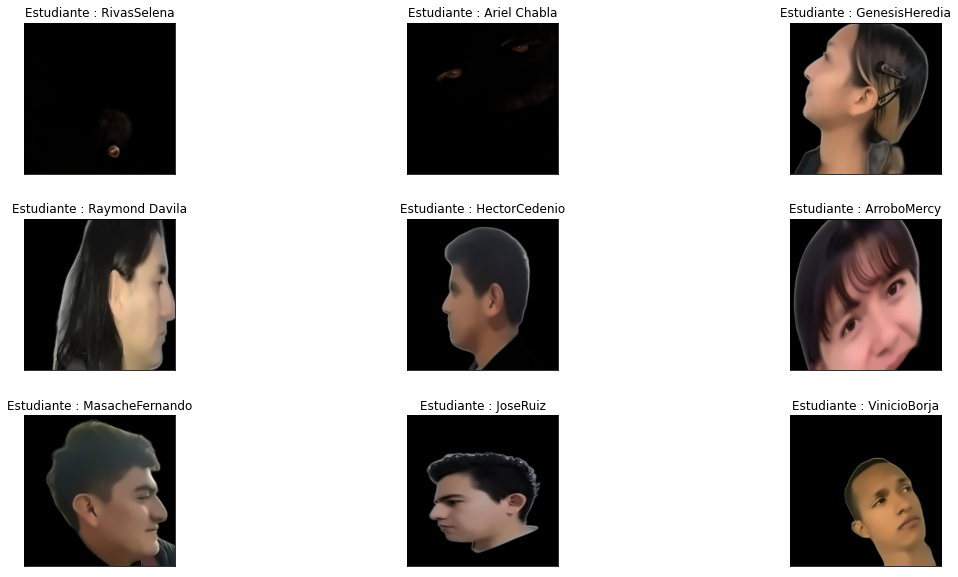

In [11]:
train_ds = x_train
test_ds = x_test
train_labels = y_train
test_labels = y_test
# muestra las imágenes aleatorias de entrenamiento
display_rand_images(x_train, y_train) 

In [12]:
from tensorflow.keras.utils import to_categorical
##One-hot-encode
y_train = to_categorical(y_train, 26)
y_test = to_categorical(y_test, 26)
y_val = to_categorical(y_val, 26)

In [13]:
# Instanciamos el modelo
model=Sequential()

#Agregamos la primera capa combolucional
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="same",activation="relu",input_shape=x_train[0].shape))

#Agregamos la primera capa max pool
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

# Agregamos la normalización al modelo
model.add(BatchNormalization())

#Agregamos la segunda capa combolucional
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la segunda capa max pool
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
# Agregamos la normalización al modelo
model.add(BatchNormalization())

#Agregamos la tercera capa combolucional
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la cuarta capa combolucional
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la quinta capa combolucional
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la tercera capa max pool
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
# Agregamos la normalización al modelo
model.add(BatchNormalization())

# Redimencionamos el modelo
model.add(Flatten())

#Añadimos la primera capa de densidad
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))
# Omitir aleatoriamente neuronas
model.add(Dropout(0.4))
# Normalizamos el modelo
model.add(BatchNormalization())

# Añadimos la segunda capa de densidad
model.add(Dense(4096,activation="relu"))
# Omitir aleatoriamente neuronas
model.add(Dropout(0.4))
# Normalizamos el modelo
model.add(BatchNormalization())

# Añadimos la segunda capa de densidad
model.add(Dense(1024,activation="relu"))
# Omitir aleatoriamente neuronas
model.add(Dropout(0.4))
# Normalizamos el modelo
model.add(BatchNormalization())
# Capa de salida
model.add(Dense(26, activation = 'softmax'))


# Arquitectura AlexNet

## Definición de las capas para el modelo CNN

### Grafica de las capas del modelo

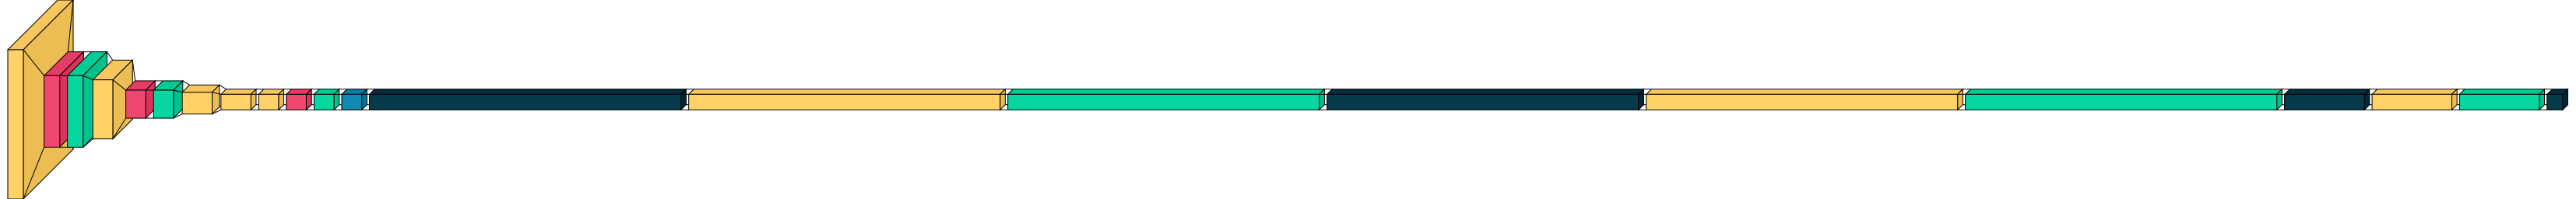

In [14]:
# Grafica
visualkeras.layered_view(model)

## Entrenamiento del modelo

In [15]:
#compila el modelo con el optimizador Adam y la función de pérdida sparse_categorical_crossentropy
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
# muestra un resumen del modelo
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 23, 23, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 19, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 256)        0         
 2D)                                                             
                                                        

In [16]:
batch_size = 32
steps_per_epoch = (x_train.shape[0]//batch_size)
validation_steps = (x_val.shape[0] // batch_size)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

In [17]:
x_train.shape,y_train.shape

((1560, 192, 192, 3), (1560, 26))

In [18]:
# Marca de tiempo
import time
import math
import logging
start_time = time.time()
history= model.fit(x_train, y_train,
    steps_per_epoch=steps_per_epoch,
    epochs = 50,
    validation_data=(x_val, y_val),
    validation_steps=validation_steps,
    batch_size = batch_size,
    callbacks=[es],
    verbose=1)

Epoch 1/50
48/48 [==============================] - 28s 553ms/step - loss: 3.6766 - accuracy: 0.1035 - val_loss: 43.8170 - val_accuracy: 0.0273
Epoch 2/50
48/48 [==============================] - 27s 567ms/step - loss: 3.1190 - accuracy: 0.1525 - val_loss: 7.2975 - val_accuracy: 0.0605
Epoch 3/50
48/48 [==============================] - 28s 580ms/step - loss: 2.9390 - accuracy: 0.1970 - val_loss: 4.1682 - val_accuracy: 0.0605
Epoch 4/50
48/48 [==============================] - 28s 583ms/step - loss: 2.6668 - accuracy: 0.2421 - val_loss: 4.5691 - val_accuracy: 0.0352
Epoch 5/50
48/48 [==============================] - 28s 576ms/step - loss: 2.4370 - accuracy: 0.2808 - val_loss: 3.9142 - val_accuracy: 0.0840
Epoch 6/50
48/48 [==============================] - 27s 571ms/step - loss: 2.1262 - accuracy: 0.3698 - val_loss: 8.5166 - val_accuracy: 0.0352
Epoch 7/50
48/48 [==============================] - 27s 573ms/step - loss: 1.9292 - accuracy: 0.4103 - val_loss: 4.6633 - val_accuracy: 0.191

## Evaluar Modelo

In [19]:
# evalúa el modelo con los datos de prueba y las etiquetas de prueba
loss, accuracy = model.evaluate(x_test, y_test) 
# muestra el resultado de la evaluación
print(loss,accuracy)

17/17 [==============================] - 2s 93ms/step - loss: 0.8432 - accuracy: 0.7981
0.8432402014732361 0.7980769276618958


## Predicción

In [20]:
# Enviamos los datos de predicción
pred = model.predict(x_test)
# Tamaño de las predicciones
pred.shape

17/17 [==============================] - 2s 93ms/step


(520, 26)

NameError: name 'test_ds' is not defined

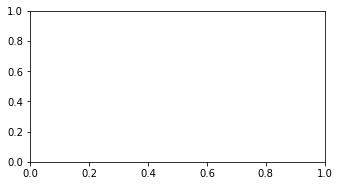

In [22]:
# crea una figura de 19x10 con una gráfica
plt.figure(1 , figsize = (19 , 10)) 
# inicializa el contador de imágenes
n = 0 

for i in range(9): # recorre las imágenes de prueba
    # incrementa el contador de imágenes
    n += 1  
    # genera un número aleatorio entre 0 y el número de imágenes de prueba
    r = np.random.randint( 0, x_test.shape[0], 1) 
    # crea una subgráfica de 3x3 con el número de la imagen
    plt.subplot(3, 3, n) 
    # ajusta el espaciado entre subgráficas
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3) 
    # muestra la imagen de prueba
    plt.imshow(test_ds[r[0]]) 
    # muestra el título con la etiqueta actual y la etiqueta predicha
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) ) 
    # oculta las etiquetas de los ejes x e y
    plt.xticks([]) , plt.yticks([]) 

# muestra la gráfica
plt.show() 

### Convertir y guardar modelo

In [23]:
import tensorflow as tf
from tensorflow import keras
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite",'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\usuar\AppData\Local\Temp\tmpaswn28ar\assets


INFO:tensorflow:Assets written to: C:\Users\usuar\AppData\Local\Temp\tmpaswn28ar\assets
